# Experiment Results
Our experiments were performed using the best parameters that maximized **accuracy**.  
We will visualize the following four experiments.

* Heterophily & Homophily Experiment
* Attribute Experiment
* Scalability Experiment
    * Edge Experiment 
    * Node & Edge Experiment       
* Class size Experiment

In [7]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("../")

path_result = "./supplementary/"

methods = [
    "MLP",
    "GCN", "ChebNet", "MoNet", "GAT", "SGC",
    "JK-GCN", "JK-GAT", "JK-GraphSAGE",
    "GraphSAGE", "GraphSAINT-GAT", "GraphSAINT-GraphSAGE", "Shadow-GAT", "Shadow-GraphSAGE",
    "H2GCN", "FSGNN", "GPRGNN",
]


In [8]:
def plot_result(dataframe, methods, x_list, base_dataset, labels: list, metric="test_acc"):
  plt.rcParams['text.usetex'] = True
  plt.style.use('default')
  sns.set()
  sns.set_style('whitegrid')
  sns.set_palette('Set1')
  fig = plt.figure(figsize=(5.5, 5))
  ax = fig.add_subplot(1, 1, 1)
  markers1 = [".", "d", "o", "v", "^", "<", ">", "1", "2", "3"]
  markers2 = ["4", "8", "p", "*", "h", "H", "x", "D"]
  markers = markers1 + markers2
  colors = plt.cm.get_cmap("tab20_r").colors

  for i, method in enumerate(methods):
    tmp = dataframe[dataframe["net"] == method]
    test_f1_macro_mean_list, test_f1_macro_std_list = [], []
    for x in x_list:
      tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x}")]
      if len(tmp_filtered) > 0:
        test_f1_macro_mean = (tmp_filtered[f"{metric}_mean"] *
                              tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
        test_f1_macro_std = (tmp_filtered[f"{metric}_std"] *
                             tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      else:
        test_f1_macro_mean = np.nan
        test_f1_macro_std = np.nan
      test_f1_macro_mean_list.append(test_f1_macro_mean)
      test_f1_macro_std_list.append(test_f1_macro_std)
    ax.errorbar(
        x_list,
        test_f1_macro_mean_list,
        yerr=test_f1_macro_std_list,
        marker=markers[i],
        label=method,
        capthick=1,
        capsize=8,
        lw=1,
        color=colors[i])
  # plt.yscale('log')
  ax.legend(ncol=3, bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.tick_params(labelsize=16)
  ax.set_xlabel(labels[0], fontsize=21)
  ax.set_ylabel(labels[1], fontsize=21)
  plt.tight_layout()
  plt.show()


# Class size Experiment

In [3]:
exp = "classsize"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}2.csv"

df_classsize = pd.read_csv(result_path)
print(df_classsize.shape)
for index, data in df_classsize.iterrows():
    df_classsize.loc[index, 'dataset'] = data.dataset.replace("flat", "balanced")
df_classsize.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date"]]


(153, 63)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date
0,GenCAT_cora_balanced_2,GCN,91.157834,0.381044,2022-05-25 20:21:57.875
1,GenCAT_cora_balanced_1,GCN,90.842741,0.364756,2022-05-25 20:21:34.605
2,GenCAT_cora_balanced_0,GCN,88.151038,0.635079,2022-05-25 20:21:10.247
3,GenCAT_cora_0.7_2,GCN,61.789572,0.476019,2022-05-25 20:20:54.928
4,GenCAT_cora_0.7_1,GCN,62.689804,0.072886,2022-05-25 20:20:39.306


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


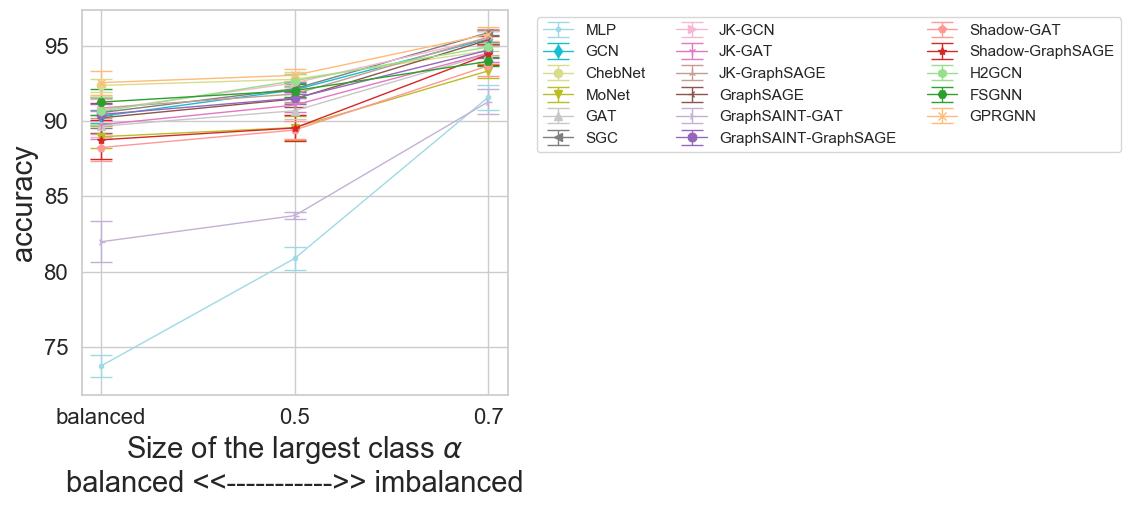

In [4]:
base_dataset = "cora"
metric = "test_acc"
xlabel = "Size of the largest class $α$\nbalanced <<----------->> imbalanced"
ylabel = 'accuracy'

x_list = ["balanced", 0.5, 0.7]
x_list = [str(x) for x in x_list]
plot_result(df_classsize, methods, x_list, base_dataset, labels=[xlabel, ylabel], metric=metric)


# Attribute Experiment

In [5]:
exp = "attribute"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}2.csv"

df_attribute = pd.read_csv(result_path)
print(df_attribute.shape)
df_attribute.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date"]]


(255, 63)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date
0,GenCAT_cora_rand_2,GCN,56.921161,1.056956,2022-05-25 18:28:26.434
1,GenCAT_cora_rand_1,GCN,58.184588,1.319706,2022-05-25 18:28:11.726
2,GenCAT_cora_rand_0,GCN,58.118806,2.331494,2022-05-25 18:27:58.086
3,GenCAT_cora_16_2,GCN,55.733765,0.837362,2022-05-25 18:27:36.158
4,GenCAT_cora_16_1,GCN,57.569211,0.250097,2022-05-25 18:27:13.574


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


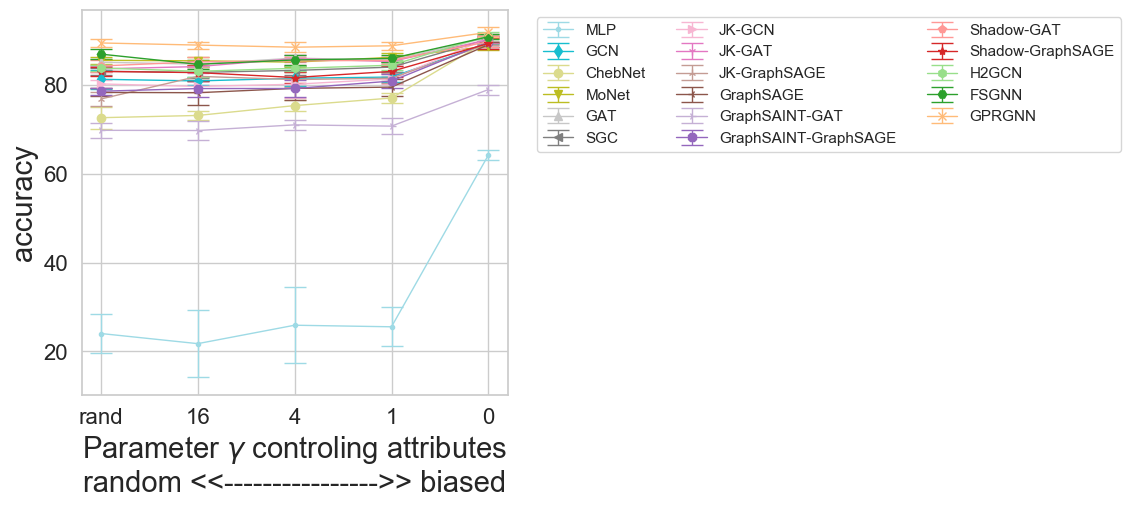

In [6]:
base_dataset = "cora"
metric = "test_acc"
xlabel = 'Parameter $γ$ controling attributes \nrandom <<---------------->> biased'
ylabel = 'accuracy'

x_list = ["rand", 16, 4, 1, 0]
x_list = [str(x) for x in x_list]

plot_result(
    df_attribute,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric)


# Heterophily & Homophily Experiment

In [8]:
# read results of the attribute experiment
exp = "hetero_homo"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}2.csv"

df_hetero_homo = pd.read_csv(result_path)
print(df_hetero_homo.shape)
df_hetero_homo.head()[["dataset", "net", "test_f1_macro_mean", "test_f1_macro_std", "date"]]

df_hetero_homo_copy = df_hetero_homo.copy()

# Replace the results for x=0 in the hetero-homo experiment with the
# results for x=0 in the attribute experiment since they are the same
# setting.
df_hetero_homo_copy = df_hetero_homo_copy.query(
    "not dataset.str.contains('GenCAT_cora_0_')", engine='python')
df_hetero_homo_adjusted = pd.concat([df_hetero_homo_copy,
                                     df_attribute.query("dataset.str.contains('GenCAT_cora_0_')", engine='python')])


(255, 63)


x_list ['8', '6', '4', '2', '0']


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


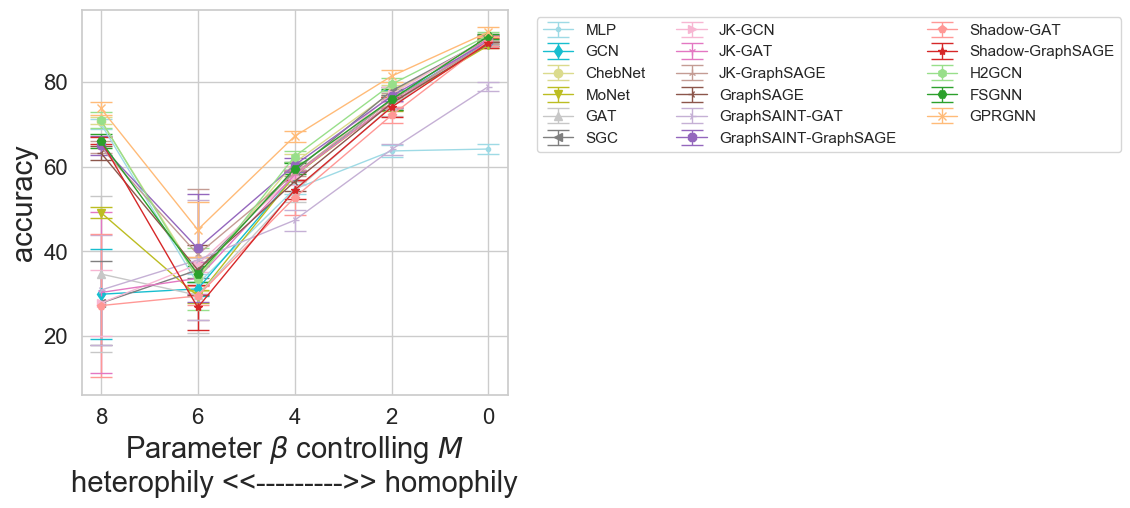

In [9]:
base_dataset = "cora"
xlabel = "Parameter $β$ controlling $M$\nheterophily <<--------->> homophily"
ylabel = 'accuracy'
metric = "test_acc"

x_list = [8, 6, 4, 2, 0]
x_list = [str(x) for x in x_list]
print("x_list", x_list)

plot_result(
    df_hetero_homo_adjusted,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric)


# Various Graph Sizes

## Edge Experiment

In [11]:
exp = "scalability_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}8.csv"

df_scalability_edge = pd.read_csv(result_path)
print(df_scalability_edge.shape)
df_scalability_edge.head()[["dataset", "net", "test_f1_macro_mean",
                                 "test_f1_macro_std", "date", "total_time_mean"]]


(204, 63)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date,total_time_mean
0,GenCAT_cora_20000_2,GCN,63.953414,0.548457,2022-06-13 17:43:22.729,0.811529
1,GenCAT_cora_20000_1,GCN,63.395142,0.672739,2022-06-13 17:43:04.427,0.799325
2,GenCAT_cora_20000_0,GCN,62.368512,0.342124,2022-06-13 17:42:44.067,0.942376
3,GenCAT_cora_15000_2,GCN,67.750824,4.377330,2022-06-13 17:42:23.726,0.934977
4,GenCAT_cora_15000_1,GCN,61.227951,1.840014,2022-06-13 17:42:04.390,0.763720


/Users/kokinoda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


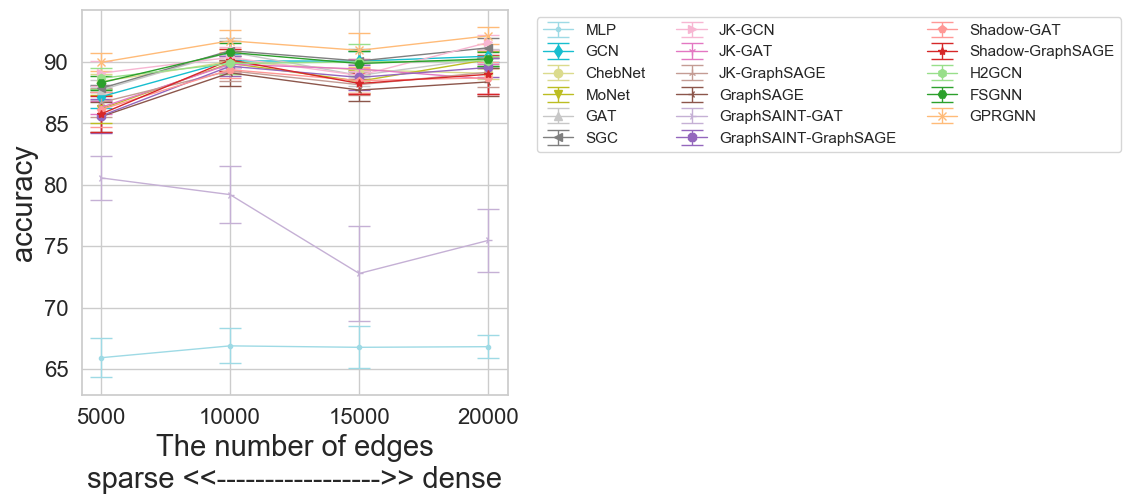

In [12]:
base_dataset = "cora"
metric = "test_acc"
ylabel = 'accuracy'
xlabel = "The number of edges\nsparse <<----------------->> dense"
x_list = [5000, 10000, 15000, 20000]
x_list = [str(x) for x in x_list]

plot_result(
    df_scalability_edge,
    methods,
    x_list,
    base_dataset,
    labels=[
        xlabel,
        ylabel],
    metric=metric)


## Node & Edge Experiment

In [10]:
exp = "scalability_node_edge"
split = "supervised"
result_path = f"{path_result}result_{exp}_{split}8.csv"

df_scalability_node_edge = pd.read_csv(result_path)
print(df_scalability_node_edge.shape)
df_scalability_node_edge.head()[["dataset", "net", "test_f1_macro_mean",
                                 "test_f1_macro_std", "date", "total_time_mean"]]


(204, 63)


,dataset,net,test_f1_macro_mean,test_f1_macro_std,date,total_time_mean
0,GenCAT_cora_12000_20000_2,GCN,63.064655,0.675894,2022-06-13 13:42:48.686,1.286078
1,GenCAT_cora_12000_20000_1,GCN,63.027311,0.591718,2022-06-13 13:42:27.468,1.283757
2,GenCAT_cora_12000_20000_0,GCN,62.044456,0.308454,2022-06-13 13:42:06.174,1.351591
3,GenCAT_cora_9000_15000_2,GCN,61.942877,0.819107,2022-06-13 13:41:41.803,2.290290
4,GenCAT_cora_9000_15000_1,GCN,62.040914,0.542659,2022-06-13 13:41:18.515,2.209702


[('3000', '5000'), ('6000', '10000'), ('9000', '15000'), ('12000', '20000')]


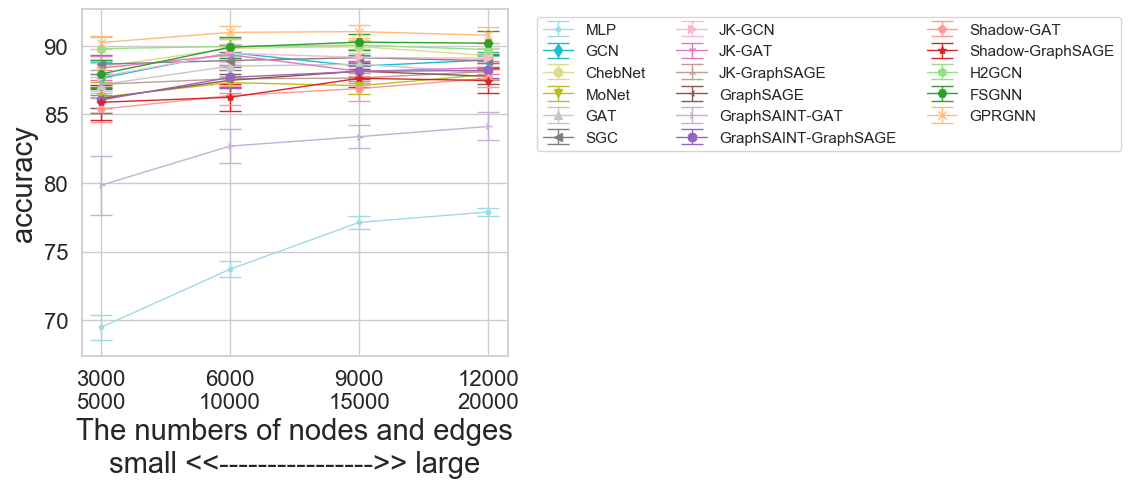

In [6]:
base_dataset = "cora"
metric = "test_acc"
ylabel = 'accuracy'
xlabel = "The numbers of nodes and edges\nsmall <<---------------->> large"
dataframe = df_scalability_node_edge

# edge_list = 5000 * (2**np.array(range(8)))  # change edge
edge_list =[5000, 10000, 15000, 20000]
edge_list = [str(x) for x in edge_list]

# node_list = 3000 * (2**np.array(range(8)))
node_list = [3000, 6000, 9000, 12000]
node_list = [str(x) for x in node_list]
x_list = list(zip(node_list,edge_list))
print(x_list)

plt.rcParams['text.usetex'] = True
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set1')
fig = plt.figure(figsize=(5.5, 4.5))
ax = fig.add_subplot(1, 1, 1)
markers1 = [".", "d", "o", "v", "^", "<", ">", "1", "2", "3"]
markers2 = ["4", "8", "p", "*", "h", "H", "x", "D"]
markers = markers1 + markers2
colors = plt.cm.get_cmap("tab20_r").colors

for i, method in enumerate(methods):
  tmp = dataframe[dataframe["net"] == method]
  test_f1_macro_mean_list, test_f1_macro_std_list = [],[]
  for x in x_list:
    tmp_filtered = tmp[tmp["dataset"].str.contains(f"GenCAT_{base_dataset}_{x[0]}_{x[1]}")]
    if len(tmp_filtered)>0:
      test_f1_macro_mean = (tmp_filtered[f"{metric}_mean"] *
          tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      test_f1_macro_std = (tmp_filtered[f"{metric}_std"] *
                  tmp_filtered["RPMAX"].astype(int)).sum() / (len(tmp_filtered) * tmp_filtered.head(1)["RPMAX"].astype(int).values[0])
      if test_f1_macro_mean==0:
        test_f1_macro_mean = np.nan
    else:
      test_f1_macro_mean = np.nan
      test_f1_macro_std = np.nan
    test_f1_macro_mean_list.append(test_f1_macro_mean)
    test_f1_macro_std_list.append(test_f1_macro_std)
  x_list_ = [f"{x_[0]}\n{x_[1]}" for x_ in x_list]
  ax.errorbar(
      x_list_,
      test_f1_macro_mean_list,
      yerr=test_f1_macro_std_list,
      marker=markers[i],
      label=method,
      capthick=1,
      capsize=8,
      lw=1,
      color=colors[i])
ax.legend(ncol=3, bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.tick_params(labelsize=16)
ax.set_xlabel(xlabel,fontsize=21)
ax.set_ylabel(ylabel,fontsize=21)
plt.show()


# Scalability Experiment

## Node & Edge Experiment

## Edge Experiment